In [1]:
pip install ydata-profiling
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [192]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
from urllib.parse import urlparse
from functions_url import *

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
def custom_read_csv(filename, delimiter1, delimiter2):
    data = []
    with open(filename, 'r') as file:
        next(file) 
        for line in file:
            parts = line.strip().split(delimiter1, 1)  # Split the line using the first delimiter
            if len(parts) == 2:
                first_part = parts[0].strip()
                second_part = parts[1].strip().split(delimiter2, 1)[0].strip()  # Split the second part using the second delimiter
                data.append((first_part, second_part))
    return pd.DataFrame(data, columns=['type', 'text'])

# Call the custom function to read the CSV file
df = custom_read_csv('spam.csv', ',', ',,,')
df

,type,text
0,ham,"""Go until jurong point, crazy.. Available only..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"""Nah I don't think he goes to usf, he lives ar..."
...,...,...
5569,spam,"""This is the 2nd time we have tried 2 contact ..."
5570,ham,Will ?_ b going to esplanade fr home?
5571,ham,"""Pity, * was in mood for that. So...any other ..."
5572,ham,The guy did some bitching but I acted like i'd...


In [195]:
df

,type,text
0,ham,"""Go until jurong point, crazy.. Available only..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"""Nah I don't think he goes to usf, he lives ar..."
...,...,...
5569,spam,"""This is the 2nd time we have tried 2 contact ..."
5570,ham,Will ?_ b going to esplanade fr home?
5571,ham,"""Pity, * was in mood for that. So...any other ..."
5572,ham,The guy did some bitching but I acted like i'd...


In [196]:
df.shape

(5574, 2)

In [197]:
df.describe()

,type,text
count,5574,5574
unique,3,5165
top,ham,"""Sorry, I'll call later"""
freq,4825,30


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [199]:
df.text.value_counts()

text
"Sorry, I'll call later"                                                                                                                                    30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..                     4
                                                                                                                                                            ..
No. On the way home. So if not for the lo

In [200]:
df.type.value_counts()

type
ham       4825
spam       747
ham"""       2
Name: count, dtype: int64

In [201]:
# Count the occurrences of each value in the specified column
value_counts = df['type'].value_counts()

# Get the values which occur only once
#values_to_remove = value_counts[value_counts == 2].index

# Keep only the rows where the value in the specified column is not in values_to_remove
filtered_df = df[~df['type'].isin(['ham"""'])]

In [202]:
filtered_df.type.value_counts()

type
ham     4825
spam     747
Name: count, dtype: int64

In [203]:
#balancing

In [204]:
# Separate majority and minority classes
majority_class = df[df['type'] == 'ham']
minority_class = df[df['type'] == 'spam']

# Upsample minority class
upsampled_minority = minority_class.sample(n=len(majority_class), replace=True, random_state=42)

# Combine majority class with upsampled minority class
balanced_df = pd.concat([majority_class, upsampled_minority])

# Shuffle the DataFrame to mix up the classes
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [205]:
balanced_df.type.value_counts()

type
ham     4825
spam    4825
Name: count, dtype: int64

In [206]:
## Aplicacion de nuevas variables

In [134]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 434.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 534.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.0/291.0 kB 370.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 535.7 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [207]:
import pandas as pd
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [178]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sebastiangonzalez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sebastiangonzalez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sebastiangonzalez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [208]:
def preprocess_text(text):
    # Convertir texto a minúsculas
    text = text.lower()
    
    # Eliminar acentos
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # Expansión de contracciones
    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        # Agrega más contracciones según sea necesario
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)
    
    # Eliminación de caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminación de stop words
    stop_words = set(stopwords.words('english'))  # Puedes utilizar otro idioma si es necesario
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lematización (convertir palabras a su forma base)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Unir tokens nuevamente en texto
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Generar características adicionales
def generate_features(text):
    # Longitud del texto
    text_length = len(text)
    
    # Número de palabras
    word_count = len(text.split())
    
    # Puedes agregar más características según sea necesario
    
    return text_length, word_count

# Aplicar preprocesamiento de texto
balanced_df['preprocessed_text'] = balanced_df['text'].apply(preprocess_text)

# Generar características adicionales
balanced_df['text_length'], balanced_df['word_count'] = zip(*balanced_df['preprocessed_text'].apply(generate_features))


In [209]:
balanced_df.head()

,type,text,preprocessed_text,text_length,word_count
0,ham,Mm yes dear look how i am hugging you both. :-P,mm yes dear look hugging p,26,6
1,ham,But pls dont play in others life.,pls dont play others life,25,5
2,ham,i can call in &lt;#&gt; min if thats ok,call ltgt min thats ok,22,5
3,ham,HMM yeah if your not too grooved out! And im l...,hmm yeah grooved im looking forward pound special,49,8
4,spam,"""Latest News! Police station toilet stolen, co...",latest news police station toilet stolen cop n...,55,9


In [210]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Ejemplo de datos


# Crear un DataFrame con los datos
df = balanced_df

# Vectorización con Bag of Words (BoW) para n=1
vectorizer_bow_1 = CountVectorizer()
bow_1_matrix = vectorizer_bow_1.fit_transform(df['text'])

# Vectorización con Bag of Words (BoW) para n=2
vectorizer_bow_2 = CountVectorizer(ngram_range=(1, 2))
bow_2_matrix = vectorizer_bow_2.fit_transform(df['text'])

# Vectorización con TF-IDF para n=1
vectorizer_tfidf_1 = TfidfVectorizer()
tfidf_1_matrix = vectorizer_tfidf_1.fit_transform(df['text'])

# Vectorización con TF-IDF para n=2
vectorizer_tfidf_2 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_2_matrix = vectorizer_tfidf_2.fit_transform(df['text'])

# Convertir las matrices a DataFrames para visualización
df_bow_1 = pd.DataFrame(bow_1_matrix.toarray(), columns=vectorizer_bow_1.get_feature_names_out())
df_bow_2 = pd.DataFrame(bow_2_matrix.toarray(), columns=vectorizer_bow_2.get_feature_names_out())
df_tfidf_1 = pd.DataFrame(tfidf_1_matrix.toarray(), columns=vectorizer_tfidf_1.get_feature_names_out())
df_tfidf_2 = pd.DataFrame(tfidf_2_matrix.toarray(), columns=vectorizer_tfidf_2.get_feature_names_out())

# Mostrar ejemplos de representación numérica
print("Bag of Words (n=1):")
print(df_bow_1.head())

print("\nBag of Words (n=2):")
print(df_bow_2.head())

print("\nTF-IDF (n=1):")
print(df_tfidf_1.head())

print("\nTF-IDF (n=2):")
print(df_tfidf_2.head())



Bag of Words (n=1):
   00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0   0    0       0             0     0     0            0            0   
1   0    0       0             0     0     0            0            0   
2   0    0       0             0     0     0            0            0   
3   0    0       0             0     0     0            0            0   
4   0    0       0             0     0     0            0            0   

   0125698789  02  ...  zebra  zed  zeros  zhong  zindgi  zoe  zogtorius  \
0           0   0  ...      0    0      0      0       0    0          0   
1           0   0  ...      0    0      0      0       0    0          0   
2           0   0  ...      0    0      0      0       0    0          0   
3           0   0  ...      0    0      0      0       0    0          0   
4           0   0  ...      0    0      0      0       0    0          0   

   zoom  zouk  zyada  
0     0     0      0  
1     0     0      0  
2     0  

In [211]:
##Parte 2
#Entrenamiento del modelo
#training 70%
#testing 30%


In [212]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['type'], test_size=0.3, random_state=42)

# Vectorize the text using Bag of Words
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train the RandomForestClassifier with Bag of Words representation
rf_bow = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_bow.fit(X_train_bow, y_train)

# Predict on the test set
y_pred_bow = rf_bow.predict(X_test_bow)

# Show evaluation metrics for Bag of Words
print("Bag of Words:")
print(classification_report(y_test, y_pred_bow))

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the RandomForestClassifier with TF-IDF representation
rf_tfidf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)

# Show evaluation metrics for TF-IDF
print("\nTF-IDF:")
print(classification_report(y_test, y_pred_tfidf))



Bag of Words:
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      1468
        spam       1.00      0.91      0.95      1427

    accuracy                           0.96      2895
   macro avg       0.96      0.96      0.96      2895
weighted avg       0.96      0.96      0.96      2895


TF-IDF:
              precision    recall  f1-score   support

         ham       0.93      1.00      0.96      1468
        spam       1.00      0.92      0.96      1427

    accuracy                           0.96      2895
   macro avg       0.96      0.96      0.96      2895
weighted avg       0.96      0.96      0.96      2895



Bag of Words:
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      1468
        spam       1.00      0.91      0.95      1427

    accuracy                           0.96      2895
   macro avg       0.96      0.96      0.96      2895
weighted avg       0.96      0.96      0.96      2895


TF-IDF:
              precision    recall  f1-score   support

         ham       0.93      1.00      0.96      1468
        spam       1.00      0.92      0.96      1427

    accuracy                           0.96      2895
   macro avg       0.96      0.96      0.96      2895
weighted avg       0.96      0.96      0.96      2895

Matriz de Confusión (Bag of Words):
 [[1465    3]
 [ 122 1305]]

Matriz de Confusión (TF-IDF):
 [[1464    4]
 [ 114 1313]]

Precisión (Bag of Words): 0.9598877866511327
Precisión (TF-IDF): 0.9618696633596063

Recall (Bag of Words): 0.9568221070811744
Recall (TF-IDF): 0.9592400690846287

AUC (Bag of Words): 0.9954492857674

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


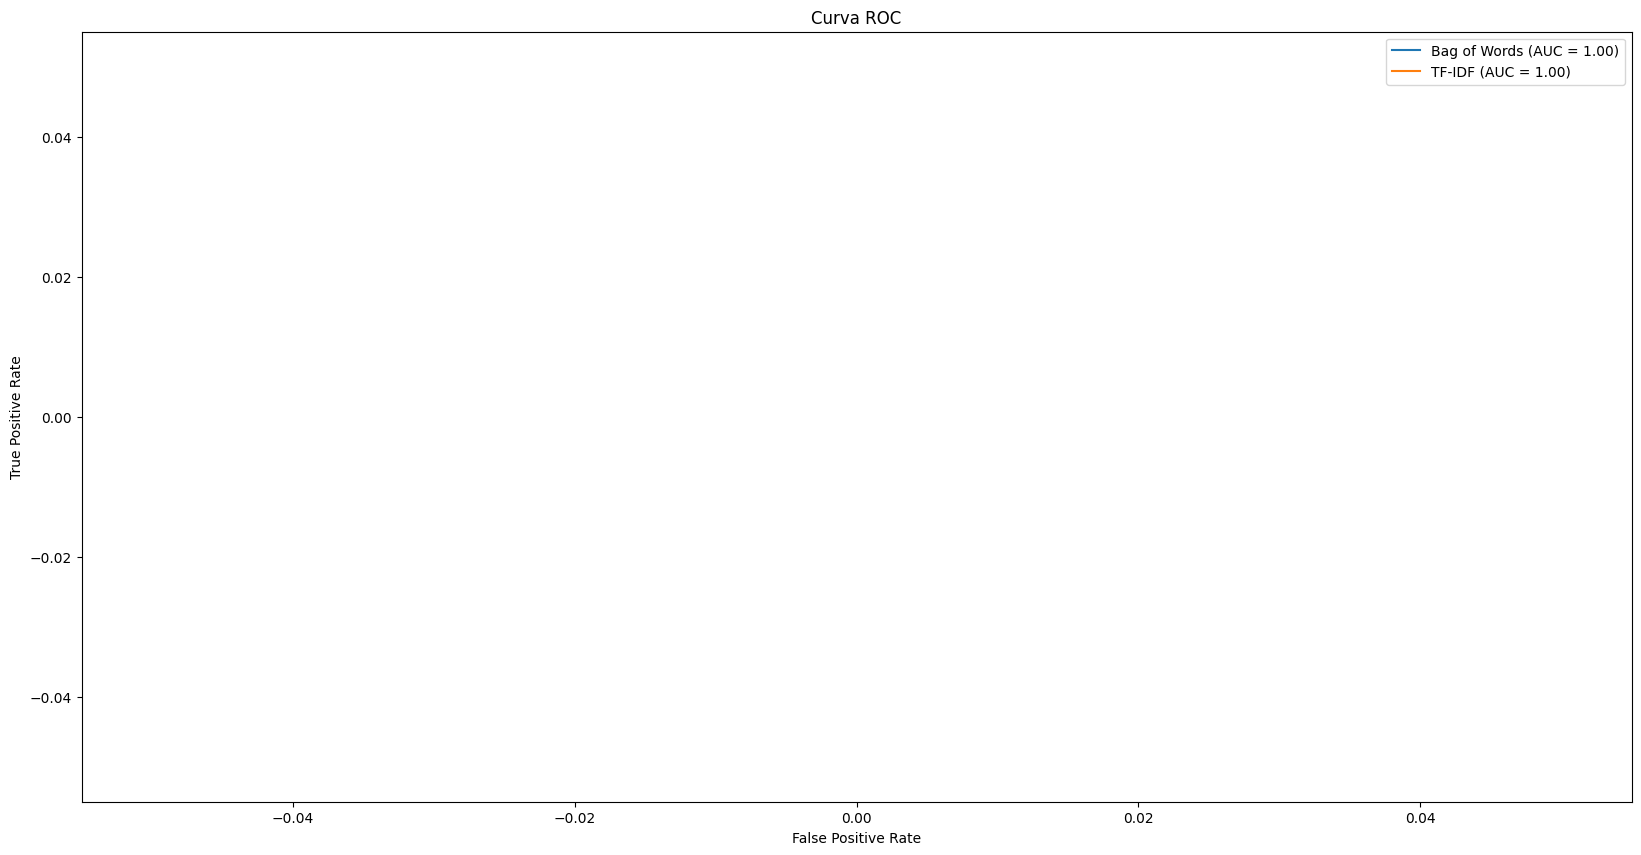

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['type'], test_size=0.3, random_state=42)

# Vectorize the text using Bag of Words
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train the RandomForestClassifier with Bag of Words representation
rf_bow = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_bow.fit(X_train_bow, y_train)

# Predict on the test set
y_pred_bow = rf_bow.predict(X_test_bow)

# Show evaluation metrics for Bag of Words
print("Bag of Words:")
print(classification_report(y_test, y_pred_bow))

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the RandomForestClassifier with TF-IDF representation
rf_tfidf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)

# Show evaluation metrics for TF-IDF
print("\nTF-IDF:")
print(classification_report(y_test, y_pred_tfidf))

# Calcular la matriz de confusión
cm_bow = confusion_matrix(y_test, y_pred_bow)
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)

# Calcular la precisión
precision_bow = precision_score(y_test, y_pred_bow, average='weighted')
precision_tfidf = precision_score(y_test, y_pred_tfidf, average='weighted')

# Calcular el recall
recall_bow = recall_score(y_test, y_pred_bow, average='weighted')
recall_tfidf = recall_score(y_test, y_pred_tfidf, average='weighted')

# Convertir las etiquetas a valores binarios
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Calcular la curva ROC y el AUC para Bag of Words
probs_bow = rf_bow.predict_proba(X_test_bow)
fpr_bow, tpr_bow, thresholds_bow = roc_curve(y_test_binary, probs_bow[:, 1], pos_label='spam')
auc_bow = roc_auc_score(y_test_binary, probs_bow[:, 1])

# Calcular la curva ROC y el AUC para TF-IDF
probs_tfidf = rf_tfidf.predict_proba(X_test_tfidf)
fpr_tfidf, tpr_tfidf, thresholds_tfidf = roc_curve(y_test_binary, probs_tfidf[:, 1], pos_label='spam')
auc_tfidf = roc_auc_score(y_test_binary, probs_tfidf[:, 1])

# Mostrar los resultados
print("Matriz de Confusión (Bag of Words):\n", cm_bow)
print("\nMatriz de Confusión (TF-IDF):\n", cm_tfidf)

print("\nPrecisión (Bag of Words):", precision_bow)
print("Precisión (TF-IDF):", precision_tfidf)

print("\nRecall (Bag of Words):", recall_bow)
print("Recall (TF-IDF):", recall_tfidf)

print("\nAUC (Bag of Words):", auc_bow)
print("AUC (TF-IDF):", auc_tfidf)

# Mostrar la curva ROC
plt.figure(figsize=(20, 10))
plt.plot(fpr_bow, tpr_bow, linestyle='-', label='Bag of Words (AUC = %0.2f)' % auc_bow)
plt.plot(fpr_tfidf, tpr_tfidf, linestyle='-', label='TF-IDF (AUC = %0.2f)' % auc_tfidf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()


In [ ]:
##parte 3

In [ ]:
Discusión
1. ¿Qué error es más “aceptable”: dejar pasar un SMS de SPAM (falso negativo) o bloquear un
SMS legítimo (falso positivo)? Justifique su respuesta.

En mi respuesta es mejor bloquear un SMS legitivo (falso positivo) porque no hay mas problema que pedirle a la persona que si no le llego revise su 
casillero de spam mientras que si pasa uno malo y no se dan cuenta se pueden haber perdidas muy grandes en una empresa.

2. Compare los valores para cada modelo de representación numérico. En base a la respuesta de
la primera pregunta ¿Qué modelo de representación numérica produjo el mejor resultado,
BoG o TF-IDF? ¿Cuál o cuáles son las razones por las que dicho modelo se comportó de mejor
manera?

En teoria TF-IDF dio un mejor resultado pero prefiero usar BoG para evitar un overfit.
En teoria TF-IDF da mejores resultados a datos nuevos entonces seria usual que tenga buenos resultados así.
   Otra ventaja que puede tener es que quita palabras que puedan estar generando ruido que no son relevantes para este estudio. 
    
3. En base a la exploración de datos e ingeniería de características que realizó en el primer y este
laboratorio, ¿qué consejos le daría a un familiar que le solicita ayuda para detectar si un email
o SMS es phishing o no? ¿En qué características de una URL/email podría fijarse su familiar
para ayudarlo a detectar un potencial phishing?

Creo que todo lo que tiene que ver con ganar dinero e ir a un link hay que tener mucho cuidado. 
Cualquier correo de una fuente extraña deberia ser tomado con pinzas. Revisar el dominio del que es mandado y revisar si es el orignal de la empresa
tambien seria bueno. pero solo viendo el contenido si estan prometiendo algo muy grande sin esfuerzo alguno, ahi no es.

4. Si detectamos una URL o email/SMS de phishing, ¿qué podemos hacer para detener su
distribución?

Lo ideal seria borrarlo, pero como siempre cabe la posiblidad que no sea spam entonces se pasan a la carpeta de spam y luego de ahi ya que el usuario decida que es lo mejor para el
